In [268]:
# import needed modules
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as sm
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [269]:
pd.set_option('max_columns', None)

In [270]:
med_df=pd.read_csv('C:/Users/kr529097/Desktop/MSDA/208/task 1/medical_clean.csv')

In [271]:
df=med_df[['Age',
       'Income',  'Additional_charges',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 
       'Diabetes',  'Anxiety',
        'Asthma', 'Services',
       'Initial_days']]

In [272]:
df.replace({'Yes':1, 'No':0}, inplace=True)

In [273]:
df=pd.get_dummies(df, columns=['Complication_risk', 'Services'])

In [274]:
df.to_csv(r'C:/Users/kr529097/Desktop/MSDA/2D209Processed.csv')

In [275]:
X=df[['Age', 'Income', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes', 'Anxiety', 'Asthma', 'Services_Blood Work', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium']]
y=df[['Additional_charges']]

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [277]:
X_train.to_csv(r'C:/Users/kr529097/Desktop/MSDA/2D209XTrain.csv')

In [278]:
X_test.to_csv(r'C:/Users/kr529097/Desktop/MSDA/2D209XTest.csv')

In [279]:
y_train.to_csv(r'C:/Users/kr529097/Desktop/MSDA/2D209yTrain.csv')

In [280]:
y_test.to_csv(r'C:/Users/kr529097/Desktop/MSDA/2D209yTest.csv')

In [281]:
dt = DecisionTreeRegressor(max_depth=3,
                           min_samples_leaf=0.1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1)

In [282]:
y_pred = dt.predict(X_test)


In [283]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [284]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

In [285]:
print(mse_dt)

3546014.3857684173


In [286]:
rmse = mse_dt**(1/2)

In [287]:
print(rmse)

1883.0863989122797


In [288]:
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

R2 score = 0.92


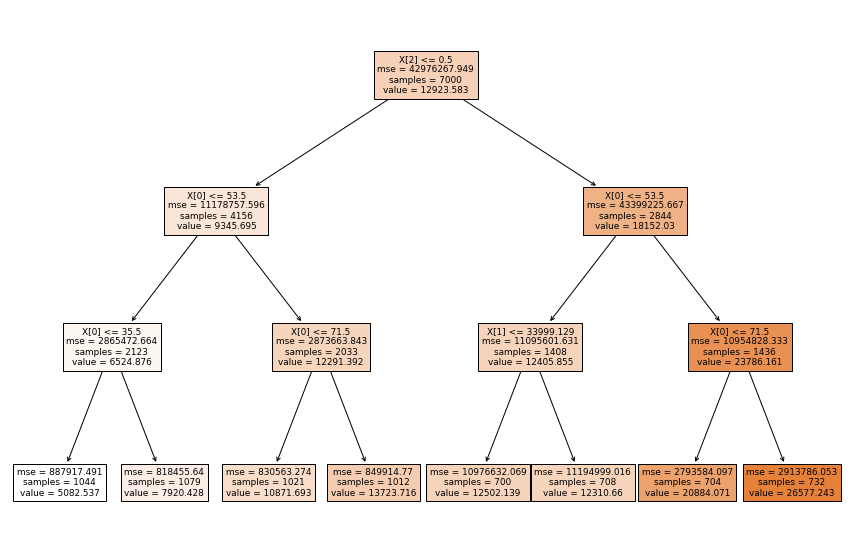

In [289]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, filled=True)

In [290]:
 df = pd.DataFrame({'Real Values':np.array(y_test).reshape(-1), 'Predicted Values':np.array(y_pred).reshape(-1)})

In [291]:
sampledf=df.sample(n=25)

In [292]:
print(sampledf)

       Real Values  Predicted Values
2786   7631.941000       7920.428114
1010  17736.880000      20884.070959
865   15441.800000      12310.659935
2244  13692.017590      13723.715536
1149   9650.318000       7920.428114
2780   8936.357000       7920.428114
2371   8029.154413      12502.138642
470   12199.610000      10871.693441
2796  13942.430000      13723.715536
1950  23600.490000      26577.243051
1301  14901.940000      12310.659935
2634   5775.697846       5082.537416
2990  15400.770000      13723.715536
2196  14630.620000      12502.138642
55     8997.926009       7920.428114
148   30087.650940      26577.243051
1513   4439.883000       5082.537416
20     9907.874090      10871.693441
1007  25182.190000      26577.243051
2638  12614.429590      13723.715536
2223  10350.800000      10871.693441
919   12340.720000      12310.659935
213   13652.028450      13723.715536
743   10603.758930      10871.693441
1485   8783.806000       7920.428114


In [293]:
print(sampledf['Real Values']/sampledf['Predicted Values']*100-100)

2786    -3.642317
1010   -15.069815
865     25.434380
2244    -0.230972
1149    21.840863
2780    12.826692
2371   -35.777753
470     12.214441
2796     1.593697
1950   -11.200383
1301    21.049075
2634    13.638078
2990    12.220120
2196    17.024938
55      13.604036
148     13.208322
1513   -12.644362
20      -8.865402
1007    -5.249051
2638    -8.082986
2223    -4.791282
919      0.244179
213     -0.522359
743     -2.464515
1485    10.900647
dtype: float64
